In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# Reading data from csv file

dataset = pd.read_csv('../../DataSets/data_set_dra_updated.csv')

x = pd.DataFrame(dataset.iloc[:, 0:5].values)
y = dataset.iloc[:, 5].values

In [14]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [15]:
# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 10, activation = 'relu', input_dim = 5))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [16]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
6930/6930 [==============================] - 4s 581us/step - loss: 15.5163 - accuracy: 0.0000e+00 - val_loss: 14.8496 - val_accuracy: 0.0000e+00
Epoch 2/100
6930/6930 [==============================] - 4s 570us/step - loss: 15.0597 - accuracy: 0.0000e+00 - val_loss: 14.8137 - val_accuracy: 0.0000e+00
Epoch 3/100
6930/6930 [==============================] - 4s 572us/step - loss: 15.0356 - accuracy: 0.0000e+00 - val_loss: 14.7731 - val_accuracy: 0.0000e+00
Epoch 4/100
6930/6930 [==============================] - 4s 586us/step - loss: 14.1104 - accuracy: 0.0000e+00 - val_loss: 12.2392 - val_accuracy: 0.0000e+00
Epoch 5/100
6930/6930 [==============================] - 4s 576us/step - loss: 10.7011 - accuracy: 0.0000e+00 - val_loss: 9.5804 - val_accuracy: 0.0000e+00
Epoch 6/100
6930/6930 [==============================] - 4s 564us/step - loss: 8.3975 - accuracy: 0.0000e+00 - val_loss: 7.6221 - val_accuracy: 0.0000e+00
Epoch 7/100
6930/6930 [==============================] - 4s 5

6930/6930 [==============================] - 4s 555us/step - loss: 2.0933 - accuracy: 0.0000e+00 - val_loss: 2.1211 - val_accuracy: 0.0000e+00
Epoch 54/100
6930/6930 [==============================] - 4s 554us/step - loss: 2.0441 - accuracy: 0.0000e+00 - val_loss: 1.3059 - val_accuracy: 0.0000e+00
Epoch 55/100
6930/6930 [==============================] - 4s 563us/step - loss: 1.9816 - accuracy: 0.0000e+00 - val_loss: 1.3183 - val_accuracy: 0.0000e+00
Epoch 56/100
6930/6930 [==============================] - 4s 565us/step - loss: 2.0372 - accuracy: 0.0000e+00 - val_loss: 5.9867 - val_accuracy: 0.0000e+00
Epoch 57/100
6930/6930 [==============================] - 4s 563us/step - loss: 1.9214 - accuracy: 0.0000e+00 - val_loss: 2.1480 - val_accuracy: 0.0000e+00
Epoch 58/100
6930/6930 [==============================] - 4s 563us/step - loss: 2.0034 - accuracy: 0.0000e+00 - val_loss: 1.6200 - val_accuracy: 0.0000e+00
Epoch 59/100
6930/6930 [==============================] - 4s 562us/step - los

In [17]:
# Prediction

y_pred = classifier.predict(x_test)

In [18]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAX_ERROR = max_error(y_test, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);

Mean Squared Error 1.0231616081918746
R-Squared:  0.947157439722561
Max Error 35.3483241896339
Mean Absolute Error 0.4181461145347057


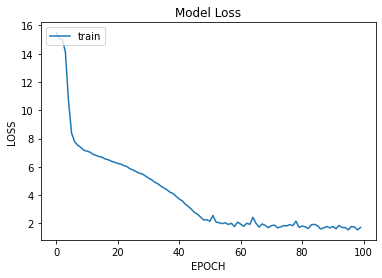

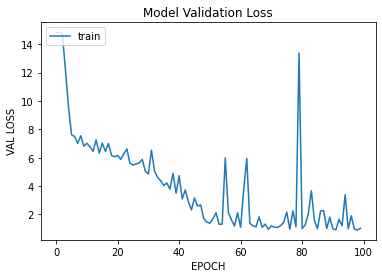

In [19]:
# Training Analysis

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

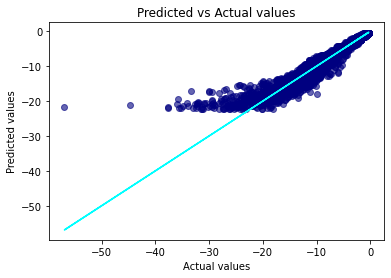

In [20]:
# Accuracy Plot

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

In [23]:
# Data Samples

d1 = [14.10, 14.55, 2.25, 2.6, 2.42] #HFSS S11 = -0.37
d2 = [13.04, 13.30, 2.3, 2.7, 1.84] # HFSS S11 = -0.43
d3 = [13.19, 13.74, 2.7, 2.45, 1.95] # HFSS S11 = -0.44
d4 = [14.42, 13.12, 2.4, 2.8, 2.41] # HFSS S11 = -0.51
d5 = [13.86, 14.57, 2.8, 2.1, 2.56] #HFSS S11 = -0.77

# Predictions
preds = classifier.predict([d1,d2,d3,d4,d5])

print("Predictions", preds);

Predictions [[-0.4736854 ]
 [-0.4736854 ]
 [-0.4736854 ]
 [-0.4736854 ]
 [-0.87850493]]


In [22]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(12, 14, SAMPLE_SIZE)
rand_height = randomSample(13, 14, SAMPLE_SIZE)
rand_freq = randomSample(2, 6, SAMPLE_SIZE)
rand_w1 = randomSample(2.5, 3.5, SAMPLE_SIZE)
rand_w2 = randomSample(2.5, 3.5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i],])

y_pred_rand = classifier.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "W1", "W2", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)

Predicted Values for random samples

   Height  Radius    W1    W2  Frequency           S11
0   13.75   12.92  3.19  3.47       4.20  [-1.7886374]
1   13.40   12.65  2.68  2.60       5.36  [-14.041438]
2   13.94   12.91  3.07  2.84       2.97  [-2.1950214]
3   13.72   13.60  3.49  3.11       3.49  [-7.4182887]
4   13.45   13.78  3.38  3.08       5.37   [-19.79478]
5   13.78   13.03  2.93  3.28       4.79   [-4.403237]
6   13.35   13.09  3.00  3.37       3.65   [-5.629153]
7   13.25   13.52  2.54  3.46       3.53   [-5.367274]
8   13.25   13.06  3.26  3.07       5.38  [-14.860829]
9   13.79   13.50  3.19  2.63       4.87  [-7.8803244]
